In [1]:
import numpy as np
import pandas as pd

In [2]:
test1 = "C:/Users/ashees/Desktop/IMS/1st_test"

In [3]:
test2 = "C:/Users/ashees/Desktop/IMS/2nd_test"

In [4]:
import os
import glob
import itertools

In [5]:
test1_file = glob.glob(test1 + "/*")
print("Total number of files inn test1: ", len(test1_file))
test2_file = glob.glob(test2 + "/*")
print("Total number of files inn test1: ", len(test2_file))

Total number of files inn test1:  2156
Total number of files inn test1:  984


In [6]:
T1 = []
for i in range(len(test1_file)):
    
    temp = pd.read_csv(test1_file[i], sep='\s+', header=None)
    T1.append(temp)

In [7]:
T2 = []
for i in range(len(test2_file)):
    
    temp = pd.read_csv(test2_file[i], sep='\s+', header=None)
    T2.append(temp)

## Features  

In [8]:
def skewness(x):
    """Calculate skewness taking x as input."""
    N = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / N
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [9]:
def kurtosis(x):
    """Calculate Kurtosis taking x as input"""
    N = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / N
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [10]:
mean_normal = [] 
mean_inner = []
mean_roller = []
mean_outer = []

rms_normal = []
rms_inner = []
rms_roller = []
rms_outer = []

pp_normal = []
pp_inner = []
pp_roller = []
pp_outer = []

crest_normal = [] 
crest_inner = []
crest_roller = []
crest_outer = []


for i in range(len(T1)):
    temp_mean = T1[i].mean()
    temp_rms = np.sqrt((T1[i] **2).mean())
    temp_max = np.max(T1[i])
    temp_min = np.min(T1[i])
    temp_pp = temp_max - temp_min
    crest_temp =  temp_max/temp_rms
    
    mean_normal.append(temp_mean[0])
    mean_inner.append(temp_mean[4])
    mean_roller.append(temp_mean[6])
    
    rms_normal.append(temp_rms[0])
    rms_inner.append(temp_rms[4])
    rms_roller.append(temp_rms[6])
    
    pp_normal.append(temp_pp[0])
    pp_inner.append(temp_pp[4])
    pp_roller.append(temp_pp[6])
    
    crest_normal.append(crest_temp[0])
    crest_inner.append(crest_temp[4])
    crest_roller.append(crest_temp[6])

In [11]:

skw_normal = []
skw_inner = []
skw_roller = []
skw_outer = []

kurt_normal = []
kurt_inner = []
kurt_roller = []
kurt_outer = []

for i in range(len(T1)):
   
    temp_sk = skewness(T1[i])
    temp_k = kurtosis(T1[i])
    
    skw_normal.append(temp_sk[0])
    skw_inner.append(temp_sk[4])
    skw_roller.append(temp_sk[6])
    
    kurt_normal.append(temp_k[0])
    kurt_inner.append(temp_k[4])
    kurt_roller.append(temp_k[6])
    

In [12]:
mean_outer = []
rms_outer = []
pp_outer = []
skw_outer = []
kurt_outer = []
crest_outer = []

for i in range(len(T2)):
    temp_mean = T2[i].mean()
    temp_rms = np.sqrt((T2[i] **2).mean())
    temp_max = np.max(T2[i])
    temp_min = np.min(T2[i])
    temp_pp = temp_max - temp_min
    crest_temp =  temp_max/temp_rms
    temp_sk = skewness(T2[i])
    temp_k = kurtosis(T2[i])
    
    mean_outer.append(temp_mean[0])
    rms_outer.append(temp_rms[0])
    pp_outer.append(temp_pp[0])
    skw_outer.append(temp_sk[0])
    kurt_outer.append(temp_k[0])
    crest_outer.append(crest_temp[0])

In [13]:
fault = ['normal'] * len(mean_normal)

Normal = pd.DataFrame(list(zip(mean_normal, rms_normal,pp_normal,skw_normal,kurt_normal,crest_normal,fault)), 
               columns =['mean', 'rms', 'peak_to_peak', 'skewness', 'kurtosis', 'crest_factor', 'fault']) 

In [14]:
fault = ['inner'] * len(mean_inner)

Inner = pd.DataFrame(list(zip(mean_inner, rms_inner,pp_inner,skw_inner,kurt_inner,crest_inner,fault)), 
               columns =['mean', 'rms', 'peak_to_peak', 'skewness', 'kurtosis', 'crest_factor', 'fault']) 

In [15]:
fault = ['roller'] * len(mean_roller)

Roller = pd.DataFrame(list(zip(mean_roller, rms_roller,pp_roller,skw_roller,kurt_roller,crest_roller,fault)), 
               columns =['mean', 'rms', 'peak_to_peak', 'skewness', 'kurtosis', 'crest_factor', 'fault']) 

In [16]:
fault = ['outer'] * len(mean_outer)

Outer = pd.DataFrame(list(zip(mean_outer, rms_outer,pp_outer,skw_outer,kurt_outer,crest_outer,fault)), 
               columns =['mean', 'rms', 'peak_to_peak', 'skewness', 'kurtosis', 'crest_factor', 'fault']) 

In [17]:
m = 1500
frames = [Normal[-m:],Inner[-m:], Roller[-m:],Outer]

features = pd.concat(frames)

In [18]:
ppp = [1,2,3,4,5,6,8]

In [19]:
ppp[-4:]

[4, 5, 6, 8]

In [20]:
features.shape

(5484, 7)

In [21]:
features.head()

,mean,rms,peak_to_peak,skewness,kurtosis,crest_factor,fault
656,-0.117572,0.152979,1.111,-0.012248,0.734078,2.634353,normal
657,-0.117401,0.153069,1.230,-0.048872,1.083927,2.867994,normal
658,-0.117416,0.153338,1.182,-0.084059,0.977600,3.104262,normal
659,-0.116934,0.154246,1.372,-0.062034,1.284049,3.228600,normal
660,-0.116772,0.152933,1.126,0.002364,0.751816,2.667840,normal


In [22]:
features['fault'] = pd.Categorical(features['fault'])

In [23]:
features['fault'].value_counts()

roller    1500
normal    1500
inner     1500
outer      984
Name: fault, dtype: int64

In [24]:
features.to_csv('feature_matrix_balanced.csv') 

## Features Visualization

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

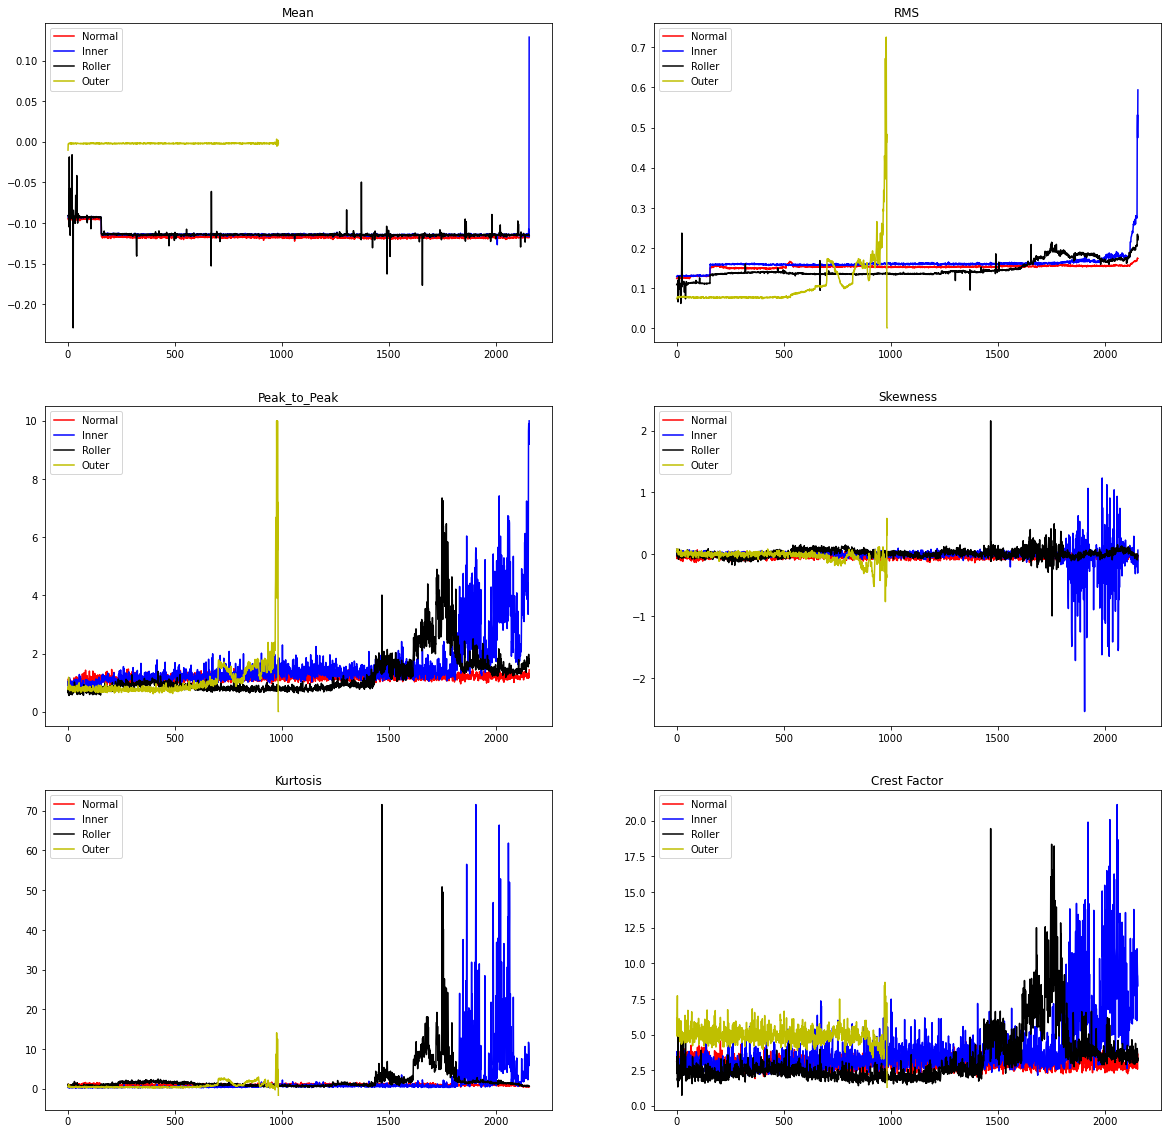

In [26]:
plt.figure(figsize = (20,20))
plt.subplot(3,2,1)
plt.plot(Normal['mean'],'r')
plt.plot(Inner['mean'],'b')
plt.plot(Roller['mean'],'k')
plt.plot(Outer['mean'],'y')
plt.title("Mean")
plt.legend(["Normal", "Inner","Roller", "Outer"], loc ="upper left") 

plt.subplot(3,2,2)
plt.plot(Normal['rms'],'r')
plt.plot(Inner['rms'],'b')
plt.plot(Roller['rms'],'k')
plt.plot(Outer['rms'],'y')
plt.title("RMS")
plt.legend(["Normal", "Inner","Roller", "Outer"], loc ="upper left") 

plt.subplot(3,2,3)
plt.plot(Normal['peak_to_peak'],'r')
plt.plot(Inner['peak_to_peak'],'b')
plt.plot(Roller['peak_to_peak'],'k')
plt.plot(Outer['peak_to_peak'],'y')
plt.title("Peak_to_Peak")
plt.legend(["Normal", "Inner","Roller", "Outer"], loc ="upper left") 

plt.subplot(3,2,4)
plt.plot(Normal['skewness'],'r')
plt.plot(Inner['skewness'],'b')
plt.plot(Roller['skewness'],'k')
plt.plot(Outer['skewness'],'y')
plt.title("Skewness")
plt.legend(["Normal", "Inner","Roller", "Outer"], loc ="upper left") 

plt.subplot(3,2,5)
plt.plot(Normal['kurtosis'],'r')
plt.plot(Inner['kurtosis'],'b')
plt.plot(Roller['kurtosis'],'k')
plt.plot(Outer['kurtosis'],'y')
plt.title("Kurtosis")
plt.legend(["Normal", "Inner","Roller", "Outer"], loc ="upper left") 

plt.subplot(3,2,6)
plt.plot(Normal['crest_factor'],'r')
plt.plot(Inner['crest_factor'],'b')
plt.plot(Roller['crest_factor'],'k')
plt.plot(Outer['crest_factor'],'y')
plt.title("Crest Factor")
plt.legend(["Normal", "Inner","Roller", "Outer"], loc ="upper left") 

plt.show()